In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

# File Analysis

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CEC9-4320

 Directory of C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Drilling\Norway-Statoil-15_$47$_9-F-12\1

05/13/2018  08:37 AM    <DIR>          .
05/13/2018  08:37 AM    <DIR>          ..
05/13/2018  08:37 AM    <DIR>          _wellboreInfo
05/13/2018  08:37 AM    <DIR>          log
05/13/2018  08:37 AM    <DIR>          trajectory
               0 File(s)              0 bytes
               5 Dir(s)   6,788,603,904 bytes free


In [13]:
well_info = r"C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Drilling\Norway-Statoil-15_$47$_9-F-12\_wellInfo\15_$47$_9-F-12 (W-353084).xml"
with open(well_info) as f:
    w_info = f.read()
w_info = BeautifulSoup(w_info, 'xml')

In [63]:
print("Field:\n\t",w_info.find_all('field')[0].text)
print("Name:\n\t",w_info.find_all('name')[0].text)
print("Region:\n\t",w_info.find_all('region')[0].text)
print("Operator:\n\t",w_info.find_all('operatorDiv')[0].text)
print("Status at date:\n\t",w_info.find_all('dTimLastChange')[0].text,"->\t",w_info.find_all('statusWell')[0].text)

Field:
	 Volve
Name:
	 15/9-F-12
Region:
	 Norwegian N. Sea
Operator:
	 Statoil Sleipner
Status at date:
	 2014-07-14T00:53:18.959Z ->	 drilling


## Trajectory
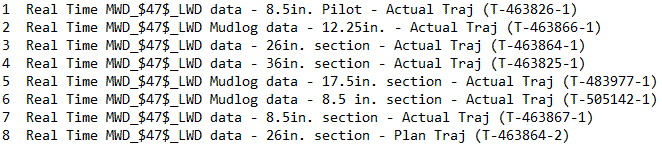

In [69]:
mwd_1 =r"C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Drilling\Norway-Statoil-15_$47$_9-F-12\1\trajectory\1.xml"
with open(mwd_1) as f:
    data = f.read()
mwd_1 = BeautifulSoup(data, 'xml')
columns = ['md','tvd', 'dispNs', 'dispEw']
w1 = pd.DataFrame()
for col in columns:
    w1[col] = [float(x.text) for x in mwd_1.find_all(col)]
w1["neg_tvd"] = w1["tvd"]*-1

In [75]:
mwd_6 =r"C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Drilling\Norway-Statoil-15_$47$_9-F-12\1\trajectory\6.xml"
with open(mwd_6) as f:
    data = f.read()
mwd_6 = BeautifulSoup(data, 'xml')
columns = ['md','tvd', 'dispNs', 'dispEw']
w6 = pd.DataFrame()
for col in columns:
    w6[col] = [float(x.text) for x in mwd_6.find_all(col)]
w6["neg_tvd"] = w6["tvd"]*-1

In [77]:
mwd_7 =r"C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Drilling\Norway-Statoil-15_$47$_9-F-12\1\trajectory\7.xml"
with open(mwd_7) as f:
    data = f.read()
mwd_7 = BeautifulSoup(data, 'xml')
columns = ['md','tvd', 'dispNs', 'dispEw']
w7 = pd.DataFrame()
for col in columns:
    w7[col] = [float(x.text) for x in mwd_7.find_all(col)]
w7["neg_tvd"] = w7["tvd"]*-1

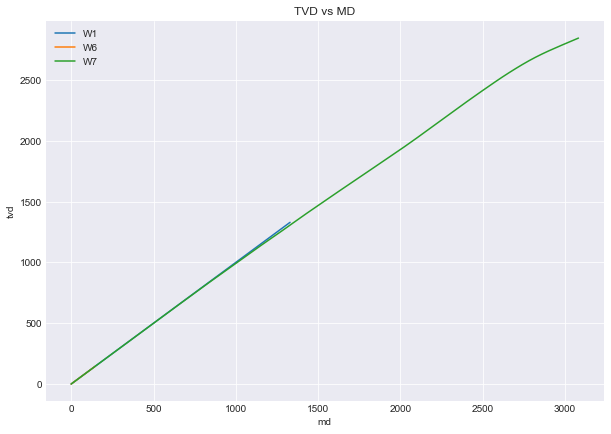

In [62]:
plt.figure(figsize=(10,7))
plt.plot(w1["md"],w1["tvd"],label="W1")
plt.plot(w6["md"],w6["tvd"],label="W6")
plt.plot(w7["md"],w7["tvd"],label="W7")
plt.title("TVD vs MD")
plt.xlabel("md") ; plt.ylabel("tvd")
plt.legend()
plt.show()

In [68]:
fig = px.line_3d(w7, 'dispNs', 'dispEw', 'neg_tvd')
fig.show()